In [1]:
import pandas as pd

df = pd.read_csv (r'./dataset.csv')
df

,id,created,facebook_id,gender,age,salary,other_income,parent_num,child_num,marriage,infirm,risk_question,risk_type,categories_version,categories_data,ans_type
0,21,2021-01-28 10:01:05.376329+00:00,2874096129581803,2,21,20000,60000,2,0,1,1,"[4, 3, 3, [4, 3, 1], 2, 3, 3, 3, 3, 3]",3,1,"{'Art': 0, 'Band': 0, 'Chef': 1, 'Mood': 0, 'S...",2
1,22,2021-01-28 10:01:05.912085+00:00,2874096129581803,2,21,20000,60000,2,0,1,1,"[4, 3, 3, [4, 3, 1], 2, 3, 3, 3, 3, 3]",3,2,"{'Art': 0, 'Band': 0, 'Chef': 1, 'Mood': 0, 'S...",2
2,23,2021-01-28 10:51:18.011598+00:00,1467108093486495,1,21,13000,6000,2,0,1,1,"[4, 2, 3, [1, 2, 3, 4], 2, 2, 3, 2, 3, 2]",2,1,"{'Art': 1, 'Band': 1, 'Chef': 0, 'Mood': 0, 'S...",2
3,24,2021-01-28 10:51:19.027727+00:00,1467108093486495,1,21,13000,6000,2,0,1,1,"[4, 2, 3, [1, 2, 3, 4], 2, 2, 3, 2, 3, 2]",2,2,"{'Art': 3, 'Band': 1, 'Chef': 0, 'Mood': 0, 'S...",2
4,25,2021-01-28 11:16:44.181398+00:00,1163951720692153,2,22,25000,360000,4,0,1,1,"[4, 4, 4, [4], 4, 4, 4, 4, 4, 4]",4,1,"{'Art': 2, 'Band': 0, 'Chef': 0, 'Mood': 0, 'S...",2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,106,2021-03-09 15:35:57.986255+00:00,5140754312665783,2,21,10000,10000,1,0,1,1,"[4, 2, 2, [1], 1, 4, 4, 4, 4, 4]",3,2,"{'Art': 7, 'Band': 2, 'Chef': 0, 'Mood': 0, 'S...",2
72,107,2021-03-10 06:45:47.064238+00:00,3882169295154559,1,22,10000,0,2,0,1,1,"[4, 1, 1, [1], 4, 1, 3, 2, 3, 2]",2,1,"{'Art': 1, 'Band': 0, 'Chef': 0, 'Mood': 0, 'S...",2
73,108,2021-03-10 06:45:47.893589+00:00,3882169295154559,1,22,10000,0,2,0,1,1,"[4, 1, 1, [1], 4, 1, 3, 2, 3, 2]",2,2,"{'Art': 1, 'Band': 0, 'Chef': 0, 'Mood': 0, 'S...",2
74,109,2021-03-10 08:15:50.543075+00:00,2933405620316114,1,53,35000,10000,0,2,2,1,"[2, 2, 3, [1, 2], 1, 1, 2, 1, 1, 2]",1,1,"{'Art': 0, 'Band': 0, 'Chef': 0, 'Mood': 0, 'S...",1


In [2]:
import json
temp_list = []
for i in df['risk_question']:
    x = json.loads(i)
    temp_list.append(x)
temp_list 
df['risk_question'] = temp_list 

for i in range(1,11):
    df[f'risk_question_{i}'] = df['risk_question'].apply(lambda x:x[i-1])

for i in range(1,5):
    temp_list = []
    for j in df['risk_question_4']:
        if i in j:
            temp_list.append(1)
        else:
            temp_list.append(0)
    df[f'risk_question_4_{i}'] = temp_list
    
df['gender'] = df['gender'] - 1
df['marriage'] = df['marriage'] - 1

for i in range(1,11):
    if i != 4:
        temp_list_1 = []
        temp_list_2 = []
        temp_list_3 = []
        temp_list_4 = []
        for j in df[f'risk_question_{i}']:
            if j == 1:
                temp_list_1.append(1)
                temp_list_2.append(0)
                temp_list_3.append(0)
                temp_list_4.append(0)
            elif j == 2:
                temp_list_1.append(0)
                temp_list_2.append(1)
                temp_list_3.append(0)
                temp_list_4.append(0)
            elif j == 3:
                temp_list_1.append(0)
                temp_list_2.append(0)
                temp_list_3.append(1)
                temp_list_4.append(0)
            elif j == 4:
                temp_list_1.append(0)
                temp_list_2.append(0)
                temp_list_3.append(0)
                temp_list_4.append(1)
        df[f'risk_question_{i}_1'] = temp_list_1
        df[f'risk_question_{i}_2'] = temp_list_2
        df[f'risk_question_{i}_3'] = temp_list_3
        df[f'risk_question_{i}_4'] = temp_list_4

df

,id,created,facebook_id,gender,age,salary,other_income,parent_num,child_num,marriage,...,risk_question_8_3,risk_question_8_4,risk_question_9_1,risk_question_9_2,risk_question_9_3,risk_question_9_4,risk_question_10_1,risk_question_10_2,risk_question_10_3,risk_question_10_4
0,21,2021-01-28 10:01:05.376329+00:00,2874096129581803,1,21,20000,60000,2,0,0,...,1,0,0,0,1,0,0,0,1,0
1,22,2021-01-28 10:01:05.912085+00:00,2874096129581803,1,21,20000,60000,2,0,0,...,1,0,0,0,1,0,0,0,1,0
2,23,2021-01-28 10:51:18.011598+00:00,1467108093486495,0,21,13000,6000,2,0,0,...,0,0,0,0,1,0,0,1,0,0
3,24,2021-01-28 10:51:19.027727+00:00,1467108093486495,0,21,13000,6000,2,0,0,...,0,0,0,0,1,0,0,1,0,0
4,25,2021-01-28 11:16:44.181398+00:00,1163951720692153,1,22,25000,360000,4,0,0,...,0,1,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,106,2021-03-09 15:35:57.986255+00:00,5140754312665783,1,21,10000,10000,1,0,0,...,0,1,0,0,0,1,0,0,0,1
72,107,2021-03-10 06:45:47.064238+00:00,3882169295154559,0,22,10000,0,2,0,0,...,0,0,0,0,1,0,0,1,0,0
73,108,2021-03-10 06:45:47.893589+00:00,3882169295154559,0,22,10000,0,2,0,0,...,0,0,0,0,1,0,0,1,0,0
74,109,2021-03-10 08:15:50.543075+00:00,2933405620316114,0,53,35000,10000,0,2,1,...,0,0,1,0,0,0,0,1,0,0


In [3]:
temp_list = []
for i in df['categories_data']:
    x = json.loads(i.replace("'", '"')) 
    temp_list.append(x)
df['categories_data'] = temp_list

key_list = []
for key in df['categories_data'][0].keys():
    key_list.append(key)
print(key_list)

for key in key_list:
    df[key] = df['categories_data'].apply(lambda x:x.get(key))
df

['Art', 'Band', 'Chef', 'Mood', 'Show', 'Actor', 'Brand', 'Cause', 'Color', 'Event', 'Gamer', 'Legal', 'Music', 'Topic', 'Artist', 'Author', 'Course', 'Dancer', 'Editor', 'Sports', 'Writer', 'Athlete', 'Blogger', 'Cuisine', 'Finance', 'Profile', 'Science', 'Comedian', 'Designer', 'Diseases', 'Election', 'Fan Page', 'Language', 'Locality', 'Musician', 'Producer', 'Community', 'Education', 'Orchestra', 'Residence', 'Scientist', 'Surgeries', 'Journalist', 'Agriculture', 'Labor Union', 'Nationality', 'Real Estate', 'Social Club', 'Sports Club', 'TV & Movies', 'Visual Arts', 'Work Status', 'Armed Forces', 'Concert Tour', 'Entrepreneur', 'Just For Fun', 'Meeting Room', 'Talent Agent', 'Ticket Sales', 'Work Project', 'Fashion Model', 'Film Director', 'Fitness Model', 'Literary Arts', 'Local Service', 'Musician/Band', 'Public Toilet', 'Satire/Parody', 'Sports Season', 'Video Creator', 'Work Position', 'Not a Business', 'Campus Building', 'Digital Creator', 'Food & Beverage', 'Harmonized Page',

,id,created,facebook_id,gender,age,salary,other_income,parent_num,child_num,marriage,...,Media Restoration Service,Religious Place of Worship,"Automotive, Aircraft & Boat",Landmark & Historical Place,Public & Government Service,Automated Teller Machine (ATM),"Beauty, Cosmetic & Personal Care","Science, Technology & Engineering",Non-Governmental Organization (NGO),Environmental Conservation Organization
0,21,2021-01-28 10:01:05.376329+00:00,2874096129581803,1,21,20000,60000,2,0,0,...,0,0,16,0,0,0,1,2,0,0
1,22,2021-01-28 10:01:05.912085+00:00,2874096129581803,1,21,20000,60000,2,0,0,...,0,0,16,0,1,0,2,6,0,0
2,23,2021-01-28 10:51:18.011598+00:00,1467108093486495,0,21,13000,6000,2,0,0,...,0,0,1,0,1,0,3,10,0,0
3,24,2021-01-28 10:51:19.027727+00:00,1467108093486495,0,21,13000,6000,2,0,0,...,0,0,2,0,2,0,3,15,0,0
4,25,2021-01-28 11:16:44.181398+00:00,1163951720692153,1,22,25000,360000,4,0,0,...,0,0,0,0,0,0,0,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,106,2021-03-09 15:35:57.986255+00:00,5140754312665783,1,21,10000,10000,1,0,0,...,0,0,0,1,6,0,3,65,2,0
72,107,2021-03-10 06:45:47.064238+00:00,3882169295154559,0,22,10000,0,2,0,0,...,0,0,0,1,0,0,1,4,0,0
73,108,2021-03-10 06:45:47.893589+00:00,3882169295154559,0,22,10000,0,2,0,0,...,0,0,0,1,2,0,2,6,0,0
74,109,2021-03-10 08:15:50.543075+00:00,2933405620316114,0,53,35000,10000,0,2,1,...,0,0,0,0,0,0,0,0,0,0


In [4]:
drop_list = ['id', 'created', 'facebook_id', 'risk_question','categories_data','infirm']
for i in range(1,11):
    drop_list.append(f'risk_question_{i}')
df.drop(drop_list, axis=1, inplace=True)
df.to_csv('pre_process_format.csv')
df

,gender,age,salary,other_income,parent_num,child_num,marriage,risk_type,categories_version,ans_type,...,Media Restoration Service,Religious Place of Worship,"Automotive, Aircraft & Boat",Landmark & Historical Place,Public & Government Service,Automated Teller Machine (ATM),"Beauty, Cosmetic & Personal Care","Science, Technology & Engineering",Non-Governmental Organization (NGO),Environmental Conservation Organization
0,1,21,20000,60000,2,0,0,3,1,2,...,0,0,16,0,0,0,1,2,0,0
1,1,21,20000,60000,2,0,0,3,2,2,...,0,0,16,0,1,0,2,6,0,0
2,0,21,13000,6000,2,0,0,2,1,2,...,0,0,1,0,1,0,3,10,0,0
3,0,21,13000,6000,2,0,0,2,2,2,...,0,0,2,0,2,0,3,15,0,0
4,1,22,25000,360000,4,0,0,4,1,2,...,0,0,0,0,0,0,0,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,1,21,10000,10000,1,0,0,3,2,2,...,0,0,0,1,6,0,3,65,2,0
72,0,22,10000,0,2,0,0,2,1,2,...,0,0,0,1,0,0,1,4,0,0
73,0,22,10000,0,2,0,0,2,2,2,...,0,0,0,1,2,0,2,6,0,0
74,0,53,35000,10000,0,2,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0


In [5]:
df_1 = df[df['categories_version'] == 1] .copy()
df_1.to_csv('categories_version_1.csv')
df_2 = df[df['categories_version'] == 2] .copy()
df_2.to_csv('categories_version_2.csv')

In [6]:
df = df_1
df.drop(['categories_version'], axis=1, inplace=True)


count = 0
accept_percent = 0.5
for key in key_list:
    i = df[key].isin([0]).sum()
    if i >= len(df.index) * accept_percent:
        print(f'{key} : {i}')
        df.drop(key, axis=1, inplace=True)
        count +=1
print(count)

Art : 20
Band : 27
Chef : 34
Mood : 38
Show : 34
Actor : 22
Cause : 36
Color : 38
Event : 22
Gamer : 24
Legal : 31
Topic : 38
Author : 22
Course : 38
Dancer : 27
Editor : 38
Sports : 22
Athlete : 29
Cuisine : 38
Finance : 20
Profile : 37
Science : 37
Comedian : 22
Designer : 36
Diseases : 38
Election : 38
Fan Page : 28
Language : 38
Locality : 29
Musician : 25
Producer : 29
Orchestra : 38
Residence : 27
Scientist : 33
Surgeries : 38
Journalist : 28
Agriculture : 25
Labor Union : 38
Nationality : 38
Real Estate : 24
Social Club : 37
Sports Club : 35
Visual Arts : 37
Work Status : 38
Armed Forces : 38
Concert Tour : 34
Entrepreneur : 25
Meeting Room : 38
Talent Agent : 35
Ticket Sales : 38
Work Project : 38
Fashion Model : 32
Film Director : 38
Fitness Model : 38
Literary Arts : 37
Public Toilet : 38
Satire/Parody : 38
Sports Season : 38
Work Position : 37
Not a Business : 25
Campus Building : 23
Digital Creator : 30
Harmonized Page : 38
Hotel & Lodging : 21
Performance Art : 36
Performi

In [7]:
df

,gender,age,salary,other_income,parent_num,child_num,marriage,risk_type,ans_type,risk_question_4_1,...,Musician/Band,Video Creator,Food & Beverage,Books & Magazines,Shopping & Retail,Media/News Company,Sports & Recreation,Arts & Entertainment,Nonprofit Organization,"Science, Technology & Engineering"
0,1,21,20000,60000,2,0,0,3,2,1,...,0,3,10,2,13,0,0,1,0,2
2,0,21,13000,6000,2,0,0,2,2,1,...,3,7,32,0,9,11,1,2,3,10
4,1,22,25000,360000,4,0,0,4,2,0,...,1,2,0,2,0,5,1,1,0,2
6,1,22,25000,0,2,0,0,3,3,1,...,0,2,1,1,3,6,1,4,2,12
8,1,21,25000,0,2,0,0,2,2,1,...,0,0,0,0,0,0,0,0,0,0
10,1,22,22000,0,1,0,0,2,2,1,...,2,4,5,5,7,4,2,4,1,0
12,1,33,10000,30000,1,2,1,2,2,1,...,0,1,1,2,1,6,2,0,1,1
14,0,45,10000,20000,0,2,1,2,3,1,...,0,24,33,5,41,14,3,2,0,0
16,1,21,10000,100000,2,0,0,2,2,1,...,41,11,13,2,21,6,9,6,4,13
18,1,22,70000,0,2,0,0,3,2,1,...,0,1,0,0,0,12,0,0,0,10


In [8]:
df.corr()

,gender,age,salary,other_income,parent_num,child_num,marriage,risk_type,ans_type,risk_question_4_1,...,Musician/Band,Video Creator,Food & Beverage,Books & Magazines,Shopping & Retail,Media/News Company,Sports & Recreation,Arts & Entertainment,Nonprofit Organization,"Science, Technology & Engineering"
gender,1.000000,-0.502099,-0.049041,0.185805,0.146441,-0.379330,-0.396788,0.287122,-0.080845,0.057443,...,0.200153,0.189028,-0.125012,0.167112,-0.004485,-0.010530,0.315654,0.110919,0.228033,0.389124
age,-0.502099,1.000000,0.382374,-0.145134,-0.482993,0.757202,0.845363,-0.386957,0.116349,0.038671,...,-0.348339,-0.427975,-0.175513,-0.396562,-0.249271,-0.275789,-0.249955,-0.353286,-0.263012,-0.406299
salary,-0.049041,0.382374,1.000000,0.282247,-0.219396,0.325557,0.336062,0.044190,0.133360,-0.152128,...,-0.232970,-0.410370,-0.061197,-0.237819,-0.058245,-0.153796,-0.162005,-0.251551,-0.123697,-0.097007
other_income,0.185805,-0.145134,0.282247,1.000000,-0.130011,0.170334,0.120344,0.010855,-0.086487,0.048273,...,-0.101887,0.067503,0.132293,0.026235,0.199623,0.025571,0.076978,-0.124977,0.043642,0.195453
parent_num,0.146441,-0.482993,-0.219396,-0.130011,1.000000,-0.464320,-0.515958,0.498213,-0.176220,-0.064476,...,0.213944,0.063908,-0.045049,0.199648,0.058797,0.040795,0.146883,0.095324,-0.083898,0.142740
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Media/News Company,-0.010530,-0.275789,-0.153796,0.025571,0.040795,-0.044666,-0.101831,0.031695,0.121927,0.069990,...,0.422883,0.669206,0.782796,0.715143,0.682155,1.000000,0.456414,0.769638,0.570493,0.434578
Sports & Recreation,0.315654,-0.249955,-0.162005,0.076978,0.146883,-0.174301,-0.181031,-0.072056,-0.184971,0.124821,...,0.723507,0.552568,0.386632,0.728452,0.337604,0.456414,1.000000,0.390379,0.168404,0.226921
Arts & Entertainment,0.110919,-0.353286,-0.251551,-0.124977,0.095324,-0.203733,-0.234947,0.103670,0.110636,0.056421,...,0.554809,0.690112,0.779635,0.637664,0.584977,0.769638,0.390379,1.000000,0.733779,0.483119
Nonprofit Organization,0.228033,-0.263012,-0.123697,0.043642,-0.083898,-0.147735,-0.170048,0.054155,0.015462,0.044065,...,0.391511,0.535686,0.511977,0.419233,0.363001,0.570493,0.168404,0.733779,1.000000,0.768237


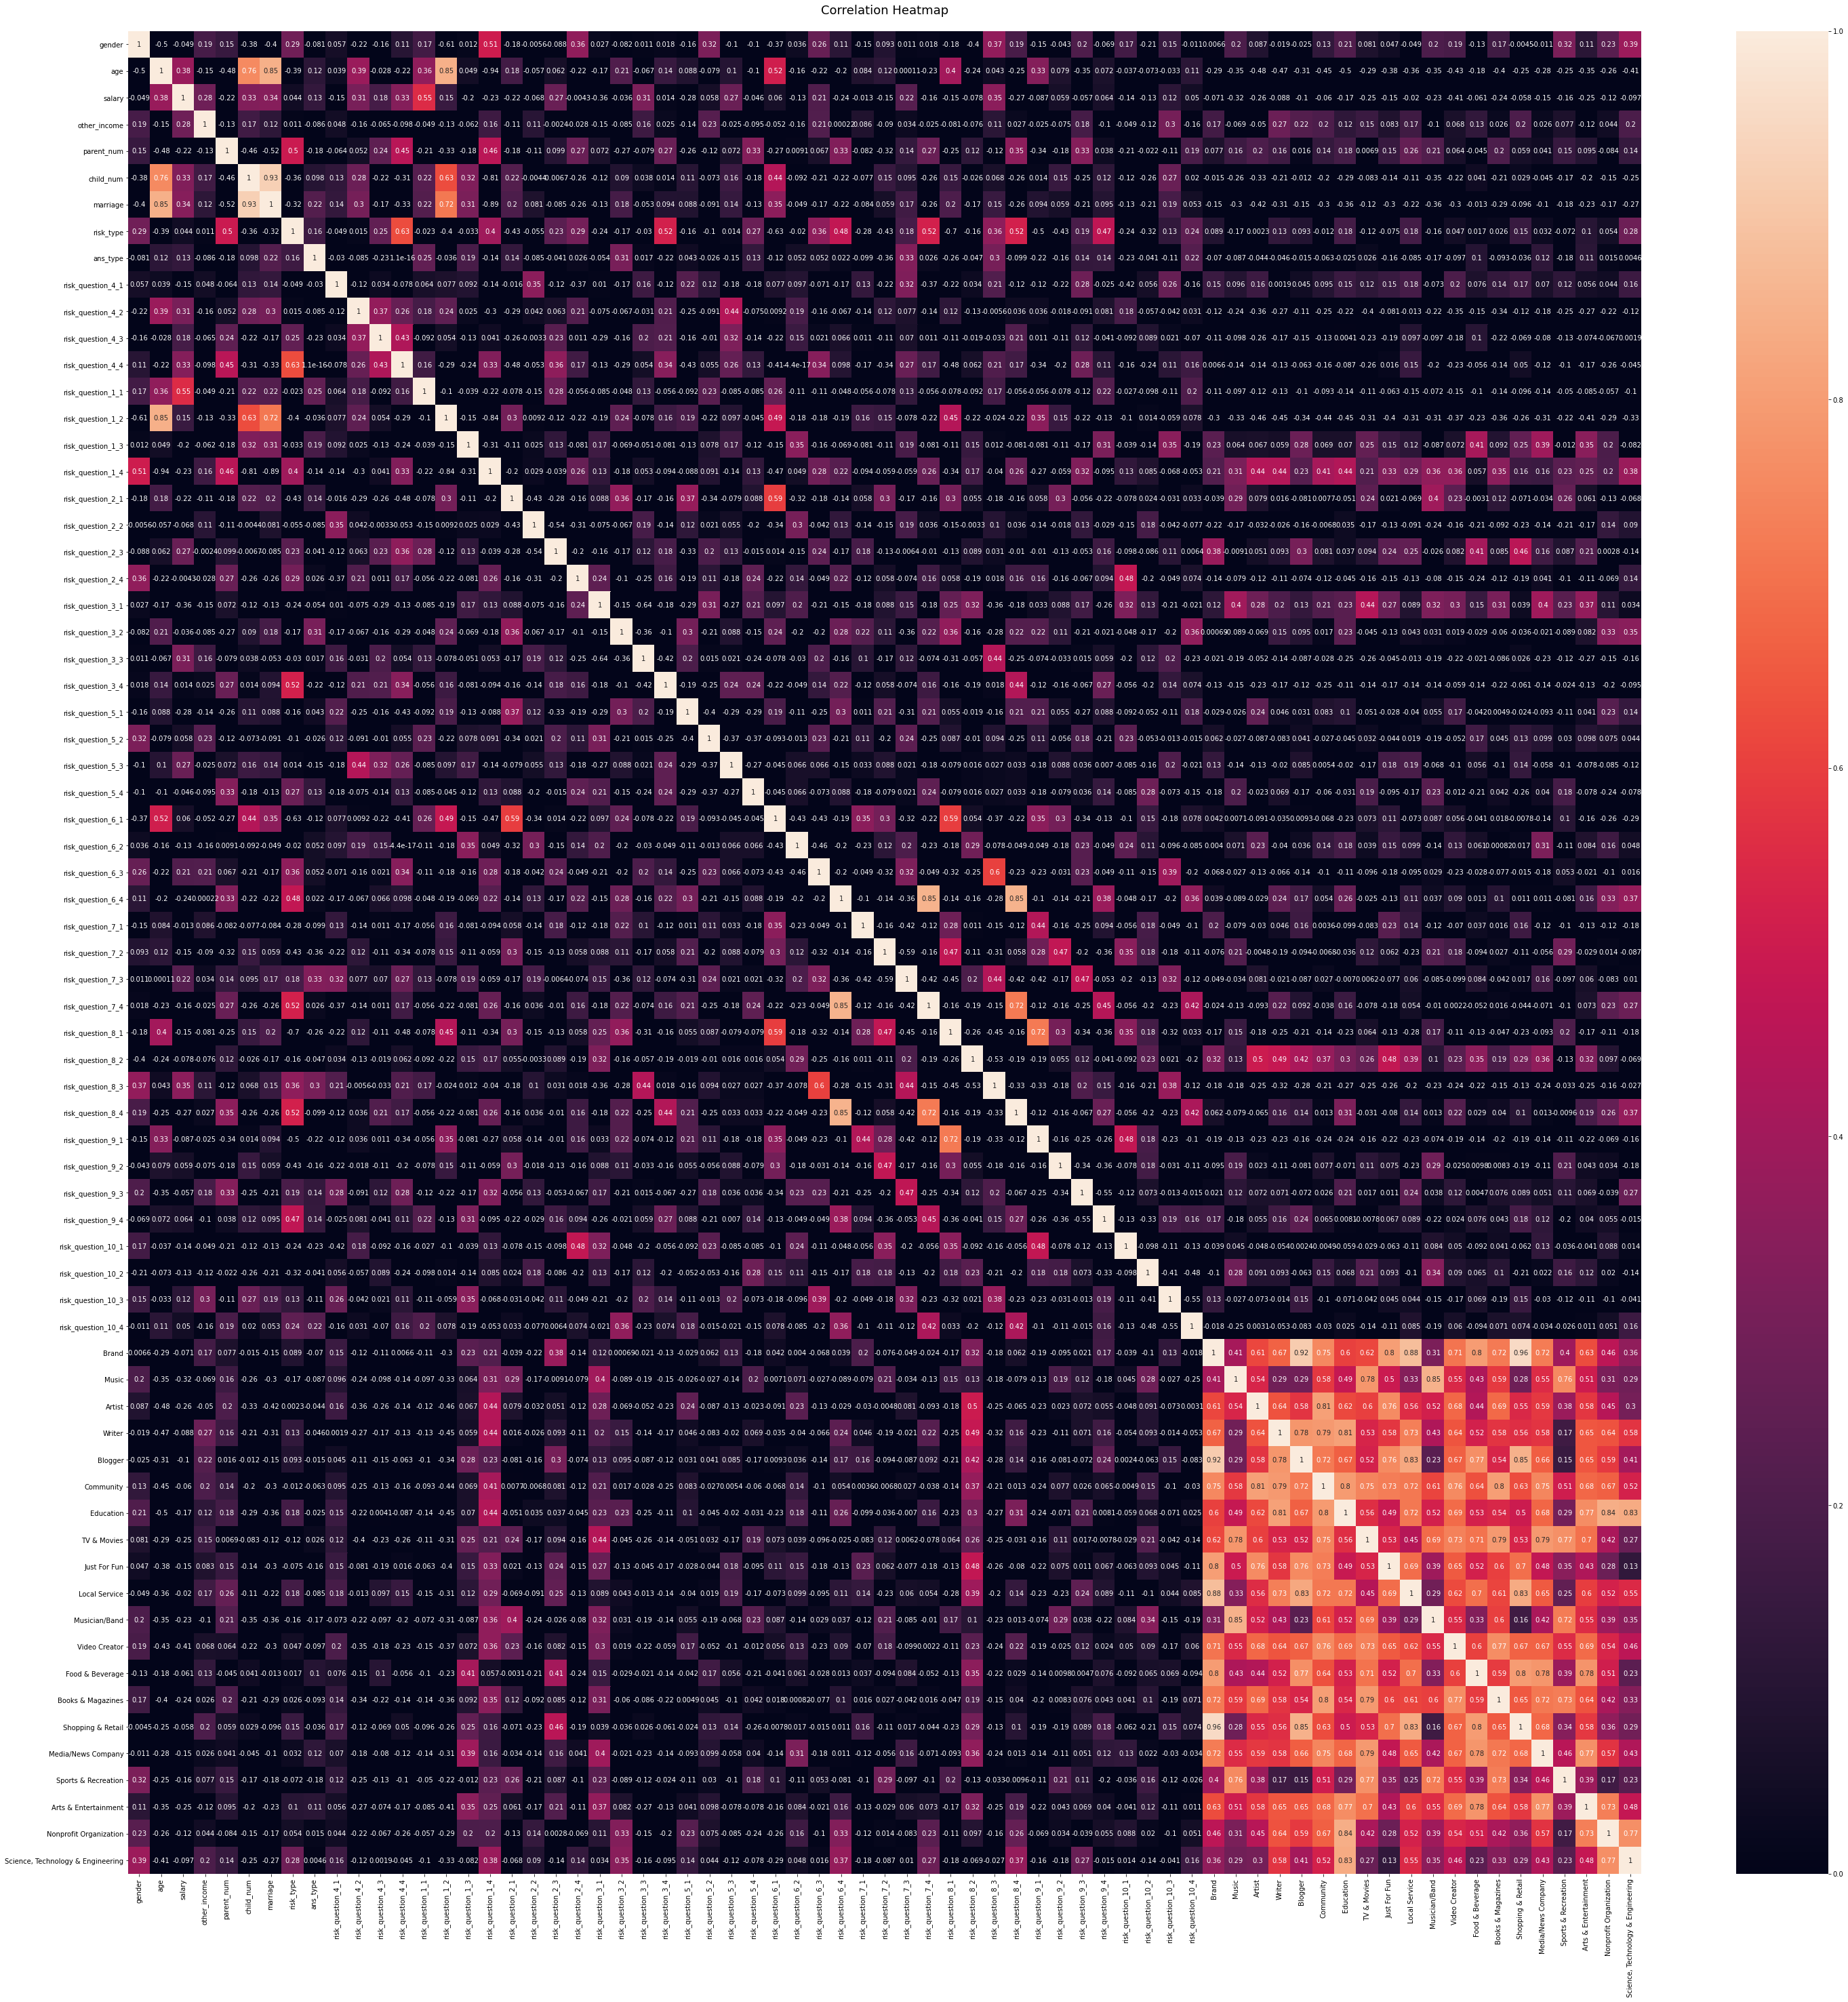

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(50, 50))
heatmap = sns.heatmap(df.corr(), vmin=0, vmax=1, annot=True, xticklabels=True, yticklabels=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':18}, pad=25);

In [10]:
not_normalize_col = [ 'risk_type','categories_version','ans_type']
for i in range(1,11):
    not_normalize_col.append(f'risk_question_{i}')

list_col = []
for col in df.columns:
    if col not in not_normalize_col :
        list_col.append(col)
list_col

['gender',
 'age',
 'salary',
 'other_income',
 'parent_num',
 'child_num',
 'marriage',
 'risk_question_4_1',
 'risk_question_4_2',
 'risk_question_4_3',
 'risk_question_4_4',
 'risk_question_1_1',
 'risk_question_1_2',
 'risk_question_1_3',
 'risk_question_1_4',
 'risk_question_2_1',
 'risk_question_2_2',
 'risk_question_2_3',
 'risk_question_2_4',
 'risk_question_3_1',
 'risk_question_3_2',
 'risk_question_3_3',
 'risk_question_3_4',
 'risk_question_5_1',
 'risk_question_5_2',
 'risk_question_5_3',
 'risk_question_5_4',
 'risk_question_6_1',
 'risk_question_6_2',
 'risk_question_6_3',
 'risk_question_6_4',
 'risk_question_7_1',
 'risk_question_7_2',
 'risk_question_7_3',
 'risk_question_7_4',
 'risk_question_8_1',
 'risk_question_8_2',
 'risk_question_8_3',
 'risk_question_8_4',
 'risk_question_9_1',
 'risk_question_9_2',
 'risk_question_9_3',
 'risk_question_9_4',
 'risk_question_10_1',
 'risk_question_10_2',
 'risk_question_10_3',
 'risk_question_10_4',
 'Brand',
 'Music',
 'Artis

In [11]:
len(list_col)

67

In [12]:
for col in list_col:
    min_value = df[col].min()
    max_value = df[col].max()
    
    df[col] = (df[col] -min_value)/(max_value-min_value)
    
df

,gender,age,salary,other_income,parent_num,child_num,marriage,risk_type,ans_type,risk_question_4_1,...,Musician/Band,Video Creator,Food & Beverage,Books & Magazines,Shopping & Retail,Media/News Company,Sports & Recreation,Arts & Entertainment,Nonprofit Organization,"Science, Technology & Engineering"
0,1.0,0.000000,0.166667,0.0240,0.50,0.000000,0.0,3,2,1.0,...,0.000000,0.115385,0.096154,0.133333,0.128713,0.000000,0.000000,0.058824,0.000000,0.052632
2,0.0,0.000000,0.108333,0.0024,0.50,0.000000,0.0,2,2,1.0,...,0.041096,0.269231,0.307692,0.000000,0.089109,0.261905,0.015873,0.117647,0.166667,0.263158
4,1.0,0.025641,0.208333,0.1440,1.00,0.000000,0.0,4,2,0.0,...,0.013699,0.076923,0.000000,0.133333,0.000000,0.119048,0.015873,0.058824,0.000000,0.052632
6,1.0,0.025641,0.208333,0.0000,0.50,0.000000,0.0,3,3,1.0,...,0.000000,0.076923,0.009615,0.066667,0.029703,0.142857,0.015873,0.235294,0.111111,0.315789
8,1.0,0.000000,0.208333,0.0000,0.50,0.000000,0.0,2,2,1.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
10,1.0,0.025641,0.183333,0.0000,0.25,0.000000,0.0,2,2,1.0,...,0.027397,0.153846,0.048077,0.333333,0.069307,0.095238,0.031746,0.235294,0.055556,0.000000
12,1.0,0.307692,0.083333,0.0120,0.25,0.666667,1.0,2,2,1.0,...,0.000000,0.038462,0.009615,0.133333,0.009901,0.142857,0.031746,0.000000,0.055556,0.026316
14,0.0,0.615385,0.083333,0.0080,0.00,0.666667,1.0,2,3,1.0,...,0.000000,0.923077,0.317308,0.333333,0.405941,0.333333,0.047619,0.117647,0.000000,0.000000
16,1.0,0.000000,0.083333,0.0400,0.50,0.000000,0.0,2,2,1.0,...,0.561644,0.423077,0.125000,0.133333,0.207921,0.142857,0.142857,0.352941,0.222222,0.342105
18,1.0,0.025641,0.583333,0.0000,0.50,0.000000,0.0,3,2,1.0,...,0.000000,0.038462,0.000000,0.000000,0.000000,0.285714,0.000000,0.000000,0.000000,0.263158


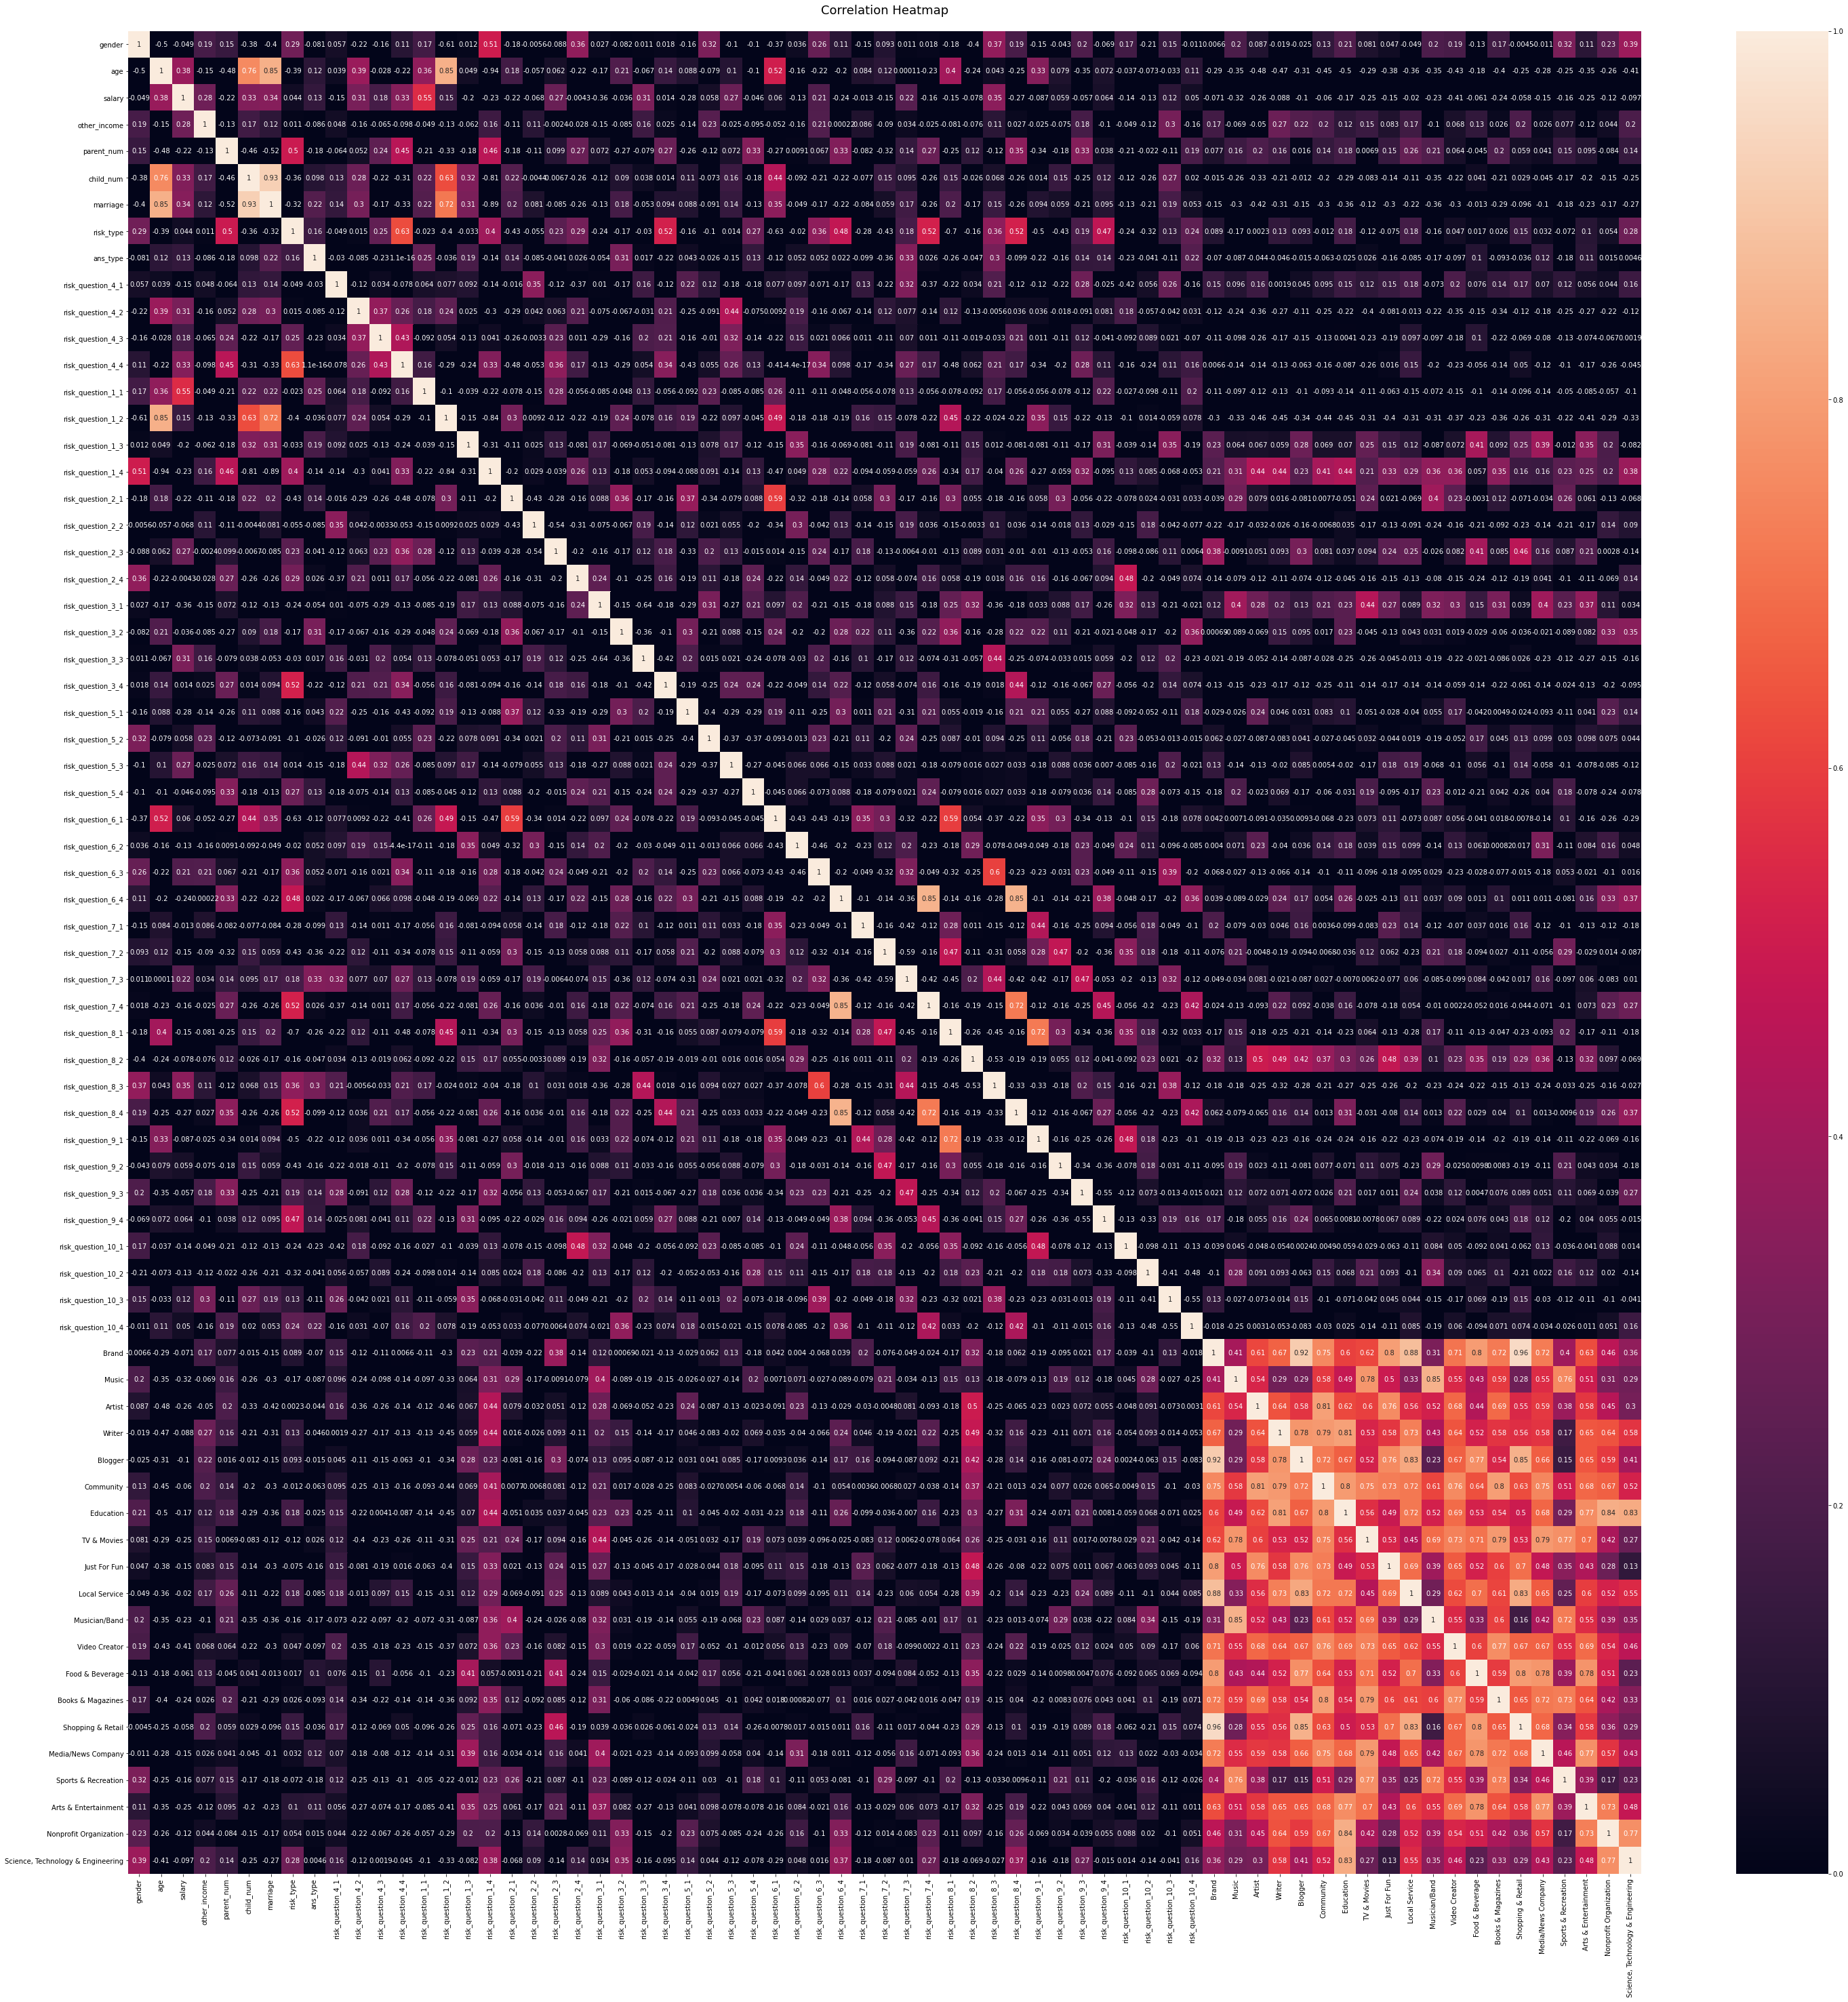

In [13]:
plt.figure(figsize=(50, 50))
heatmap = sns.heatmap(df.corr(), vmin=0, vmax=1, annot=True, xticklabels=True, yticklabels=True)
# Give a title to the heatmap. Pad defines the distance of the title from the top of the heatmap.
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':18}, pad=25);


In [14]:
df

,gender,age,salary,other_income,parent_num,child_num,marriage,risk_type,ans_type,risk_question_4_1,...,Musician/Band,Video Creator,Food & Beverage,Books & Magazines,Shopping & Retail,Media/News Company,Sports & Recreation,Arts & Entertainment,Nonprofit Organization,"Science, Technology & Engineering"
0,1.0,0.000000,0.166667,0.0240,0.50,0.000000,0.0,3,2,1.0,...,0.000000,0.115385,0.096154,0.133333,0.128713,0.000000,0.000000,0.058824,0.000000,0.052632
2,0.0,0.000000,0.108333,0.0024,0.50,0.000000,0.0,2,2,1.0,...,0.041096,0.269231,0.307692,0.000000,0.089109,0.261905,0.015873,0.117647,0.166667,0.263158
4,1.0,0.025641,0.208333,0.1440,1.00,0.000000,0.0,4,2,0.0,...,0.013699,0.076923,0.000000,0.133333,0.000000,0.119048,0.015873,0.058824,0.000000,0.052632
6,1.0,0.025641,0.208333,0.0000,0.50,0.000000,0.0,3,3,1.0,...,0.000000,0.076923,0.009615,0.066667,0.029703,0.142857,0.015873,0.235294,0.111111,0.315789
8,1.0,0.000000,0.208333,0.0000,0.50,0.000000,0.0,2,2,1.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
10,1.0,0.025641,0.183333,0.0000,0.25,0.000000,0.0,2,2,1.0,...,0.027397,0.153846,0.048077,0.333333,0.069307,0.095238,0.031746,0.235294,0.055556,0.000000
12,1.0,0.307692,0.083333,0.0120,0.25,0.666667,1.0,2,2,1.0,...,0.000000,0.038462,0.009615,0.133333,0.009901,0.142857,0.031746,0.000000,0.055556,0.026316
14,0.0,0.615385,0.083333,0.0080,0.00,0.666667,1.0,2,3,1.0,...,0.000000,0.923077,0.317308,0.333333,0.405941,0.333333,0.047619,0.117647,0.000000,0.000000
16,1.0,0.000000,0.083333,0.0400,0.50,0.000000,0.0,2,2,1.0,...,0.561644,0.423077,0.125000,0.133333,0.207921,0.142857,0.142857,0.352941,0.222222,0.342105
18,1.0,0.025641,0.583333,0.0000,0.50,0.000000,0.0,3,2,1.0,...,0.000000,0.038462,0.000000,0.000000,0.000000,0.285714,0.000000,0.000000,0.000000,0.263158


              precision    recall  f1-score   support

           1       0.50      0.25      0.33         4
           2       0.57      0.57      0.57         7
           3       0.33      1.00      0.50         1

    accuracy                           0.50        12
   macro avg       0.47      0.61      0.47        12
weighted avg       0.53      0.50      0.49        12



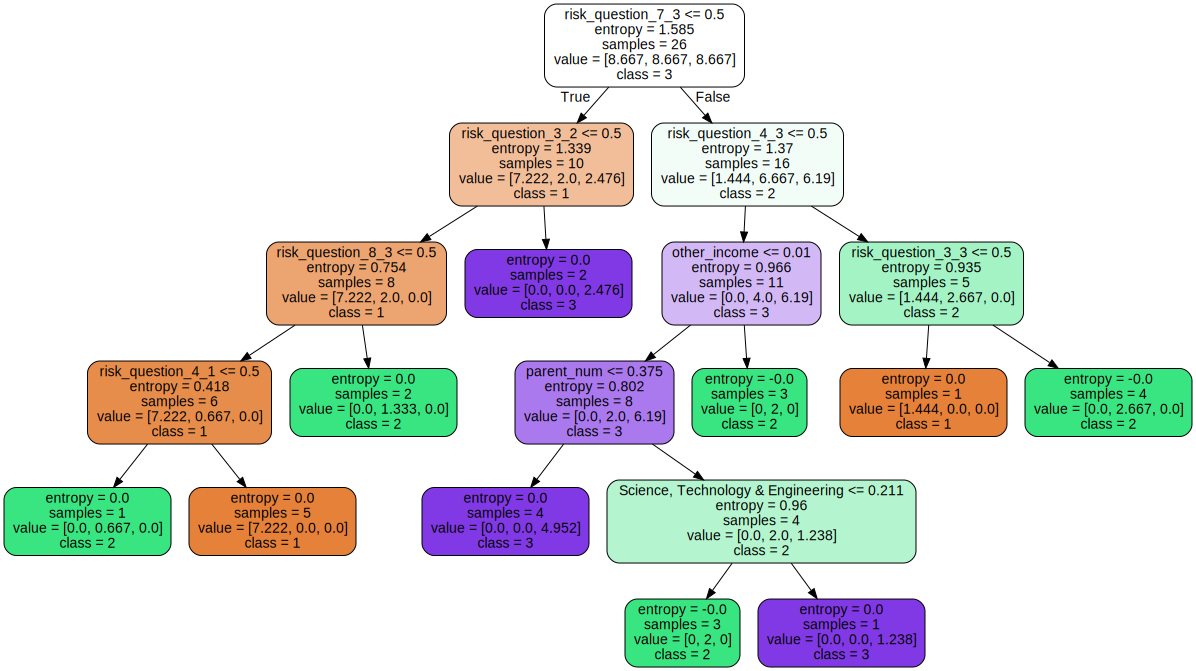